In [1]:
import numpy as np

a = np.arange(15).reshape(3, 5)
print(a)
'''了解它的结构''' 
print(a.shape )  # shape ,是数组的维数，这是由每个维度的大小组成的一个元组，对于一个 n 行 m 列的矩阵。shape 是 (n, m)
print(a.ndim)  # ndim :数组的 axes （维数）数值大小
print(a.dtype.name)  # 在数组中描述元素类型的一个对象
print(a.itemsize)  # itemsize:数组中每个元素所占字节数。例如，一个 float64 的 itemsize 是 8 ( = 64/8bit)
print(a.size) #size:数组元素的个数总和，这等于 shape 元组数字的乘积。

'''基本操作'''
B = np.array( [20,30,40,50] )
bwxp=np.exp(B)
print("对每个数进行exp运算",bwxp)

'''索引迭代'''
bsort=B[1:]
print("切片运算",bsort)
print("迭代运算：")
for  i in B:
    print(i*2)

'''常用计算'''
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
print("加法运算：",x+y)
print("减法运算：",x-y)
print("乘法运算:",x*y)
print("除法运算：",x/y)
print("矩阵运算:",x.dot(y))

# 广播机制，它让Numpy可以让不同大小的矩阵在一起进行数学计算
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v
print("广播：",y)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
(3, 5)
2
int32
4
15
对每个数进行exp运算 [4.85165195e+08 1.06864746e+13 2.35385267e+17 5.18470553e+21]
切片运算 [30 40 50]
迭代运算：
40
60
80
100
加法运算： [[ 6.  8.]
 [10. 12.]]
减法运算： [[-4. -4.]
 [-4. -4.]]
乘法运算: [[ 5. 12.]
 [21. 32.]]
除法运算： [[0.2        0.33333333]
 [0.42857143 0.5       ]]
矩阵运算: [[19. 22.]
 [43. 50.]]
广播： [[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [2]:
import pandas as pd
#选择数据
dates = pd.date_range('20130101', periods=6)         # 创建一个6X4矩阵数据
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])
print(df)
print("选择A的数据：",df['A'])
print("##############################################################")
print("跨越多行的选择数据：",df[0:3])
#使用标签来选择数据 loc
print("根据标签选择：",df.loc['20130102'])
#根据位置进行选择iloc
print("根据位置坐标来选择",df.iloc[3,1])
#设置值
df.B[df.A>4] = 0 #根据条件设置，对于A？4的位置，将B设置为0
df['E'] = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130101',periods=6)) #添加数据，但是长度必须对齐
print(df)
print("##############################################################")
#处理数据
#df.iloc[0,1] = np.nan
#df.iloc[1,2] = np.nan
#df.dropna(axis=1,how='any') # axis=0,     # 0: 对行进行操作; 1: 对列进行操作, 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop
df.fillna(value=0)#将NAN 的值用1来代替
print(df)
#合并
df1 = pd.DataFrame(np.ones((3,4))*3, columns=['a','b','c','d'] ,index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'],index=[2,3,4])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])

#concat纵向合并
res = pd.concat([df1, df2, df3], axis=0)
res = pd.concat([df1, df2, df3], axis=0, ignore_index=True)#重置index
print("合并后的数据：",res)
#join方式合并
#纵向"外"合并df1与df2
res = pd.concat([df1, df2], axis=0, join='outer')
print("纵向外的方式合并:",res)
#append方式添加数据
s1 = pd.Series([1,2,3,4], index=['a','b','c','d'])
res = df1.append(df3, ignore_index=True)
print("append的方式添加：",res)

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23
选择A的数据： 2013-01-01     0
2013-01-02     4
2013-01-03     8
2013-01-04    12
2013-01-05    16
2013-01-06    20
Freq: D, Name: A, dtype: int32
##############################################################
跨越多行的选择数据：             A  B   C   D
2013-01-01  0  1   2   3
2013-01-02  4  5   6   7
2013-01-03  8  9  10  11
根据标签选择： A    4
B    5
C    6
D    7
Name: 2013-01-02 00:00:00, dtype: int32
根据位置坐标来选择 13
             A  B   C   D  E
2013-01-01   0  1   2   3  1
2013-01-02   4  5   6   7  2
2013-01-03   8  0  10  11  3
2013-01-04  12  0  14  15  4
2013-01-05  16  0  18  19  5
2013-01-06  20  0  22  23  6
##############################################################
             A  B   C   D  E
2013-01-01   0  1   2   3  1
2013-01-02   4  5   6   7  2
2013-01-03   8  0  10  11  3
2013-01-04  12  0  14  15

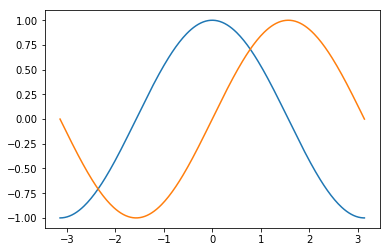

In [3]:
#简单例子
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)
plt.plot(X,C)
plt.plot(X,S)

plt.show()

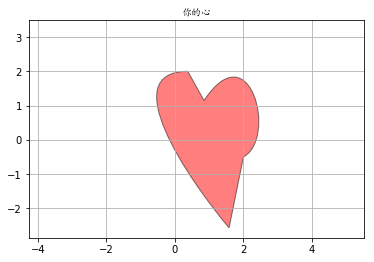

In [4]:
# 其他图像
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
# 显示中文
prop = fm.FontProperties(fname='C:/Windows/Fonts/simkai.ttf')
fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
#line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.title(u'你的心', fontproperties=prop)
plt.show()